In [2]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading input csv file
data=pd.read_csv('C:/Users/deepesh/Downloads/loan_dataset.csv')
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [6]:
data1=data.drop(['financial_institution','loan_purpose','loan_id'],axis=1)

In [8]:
#extracting year and month from Origination date & first payment date
data1['origination_year'] = pd.DatetimeIndex(data1['origination_date']).year
data1['origination_month'] = pd.DatetimeIndex(data1['origination_date']).month
data1['first_payment_year']=pd.DatetimeIndex(data1['first_payment_date']).year
data1['first_payment_month']=pd.DatetimeIndex(data1['first_payment_date']).month
df1=data1.drop(['first_payment_date','origination_date'],axis=1)

In [9]:
df1=pd.get_dummies(df1)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 30 columns):
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                          116058 non-null int64
m3                          116058 non-null int64
m4                          116058 non-null int64
m5                          116058 non-null int64
m6                          116058 non-null int64
m7                          116058 non-null int64
m8                       

In [11]:
# Seperating Target field and features
y=df1['m13']
x=df1.drop('m13',axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#splitting dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

# Creating Logistic Regression model

In [14]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model=logit_model.fit(x_train,y_train)
y_pred_logit=logit_model.predict(x_test)

C:\Users\deepesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test,y_pred_logit)

array([[23076,     8],
       [  128,     0]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn import metrics
print('Accuracy:',accuracy_score(y_test,y_pred_logit))

Accuracy: 0.9941409615716009


# Creating K-NN Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
metric_k=[]    #empty list
neighbors=range(3,15)
for k in neighbors:
    classifr=KNeighborsClassifier(n_neighbors=k)
    classifr=classifr.fit(x_train,y_train)
    y_pred_KNN=classifr.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

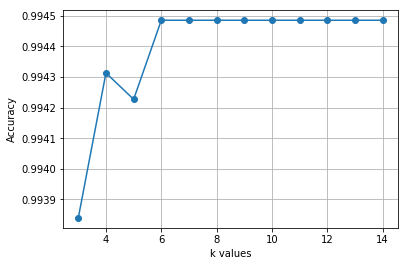

In [21]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid()

In [22]:
#building model with K=6
classifr=KNeighborsClassifier(n_neighbors=6)
classifr=classifr.fit(x_train,y_train)
y_pred_KNN=classifr.predict(x_test)

In [23]:
confusion_matrix(y_test,y_pred_KNN)

array([[23084,     0],
       [  128,     0]], dtype=int64)

In [24]:
print('Accuracy:',accuracy_score(y_test,y_pred_KNN))

Accuracy: 0.9944856108909185


# Creating Random Forest Classification model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

C:\Users\deepesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
confusion_matrix(y_test,y_pred_rf)

array([[23077,     7],
       [   87,    41]], dtype=int64)

In [28]:
print('Accuracy:',accuracy_score(y_test,y_pred_rf))

Accuracy: 0.9959503704980183
